# Преамбула
Экзамен состоит из трёх блоков:  
- программирование на python;  
- работа с датафреймами и описательная статистика;  
- классическое машинное обучение.

В каждом вопросе может быть **любое** количество правильных ответов.  
Стоимость вопроса равна одному баллу, если не сказано иное.  
Для успешной сдачи экзамена необходимо набрать 50% и более от максимального числа баллов.

- **NB:** В первом блоке (программирование на python) **ЗАПРЕЩЕНО** пользоваться библиотеками, не посталяемыми вместе с python по-умолчанию (т.е. pandas/numpy нельзя использовать в это блоке, а random/json -- можно);  
- Все спорные моменты трактуются в пользу экзаменуемого;  
- Ваш код должен быть воспроизводим (если я положу исходные файлы в ту же папку, что и Ваш ноутбук, и нажму `Run` -> `Run All Cells`, то всё должно работать). Так что соблюдайте логику и последовательнось запуска ячеек. Спасибо :)  
- Можно пользоваться только своей головой, но любыми материалами и интернетом;  
- Если задание кажется сложным -- пропустите его;  

- Во время экзамена я буду отвечать только на вопросы касаемо формулировок заданий.

Главное, не спешите, проверяйте, что и куда записывается.  
За каждого болею.  
Всем удачи!  


# Программирование на python

## 1.

### 1.1 (1 балл)
В некоторой стране ввели налог на воздух, сумма которого вычисляется по следующей формуле 
$$ T = V_{см^3} * k + base $$,
где $T$ -- размер налога, $V$ -- суммарный объём вдохнутоо воздуха, $k$ -- некоторый коэффициент, $base$ -- базовая надбавка.

> Реализуйте функцию `breath_tax`, которая принимает в качестве аргументов объём вдохнутого воздуха и значения для $k$ и $base$ и возвращает сумму налога. Возвращаемое значение округлить до 2 знаков после запятой.

In [8]:
# ans 1.1
def breath_tax(V, k, base):
    return round(V * k + base, 2)

In [9]:
breath_tax(3333, 1.475, 25)

4941.18

In [10]:
assert breath_tax(3333, 1.475, 25) == 4941.18

### 1.2 (1 балл)  

Сделайте $k$ и $base$ keyword аргументами со значениями по-умолчанию 1.5 и 100 соответственно.

In [4]:
# ans 1.2
def breath_tax(V, k=1.5, base=100):
    return round(V * k + base, 2)

In [14]:
# ans 1.2
def breath_tax(V: int, k: float=1.5, base: float=100.0) -> float:
    """
    DOCSTRING
    """
    return round(V * k + base, 2)

In [13]:
assert breath_tax(3333) == 5099.5

## 2. (2 балла)
Дан файл `flat_data.json` с информацией о стоимости и других параметрах квартир.  Сконвертируйте его в файл `flat_data.csv` csv формата. В качестве разделителя используйте точку с запятой (";"). 

Пример результата:  
<center>
    <img src="data/task2.png" />
</center>

In [16]:
# ans 2
import json
with open('data/flat_data.json', 'r', encoding='utf8') as inp:
    data = json.load(inp)

In [23]:
a = [1, 2, 3, 4, 5]
print(a)

[1, 2, 3, 4, 5]


In [24]:
print(*a)

1 2 3 4 5


In [25]:
print(a[0], a[1], a[2], a[3], a[4])

1 2 3 4 5


In [ ]:
with open('data/flat_data.csv', 'w', encoding='utf8') as out:
    cols = ['wallsMaterial', 'floorNumber', 'floorsTotal', 'totalArea', 'kitchenArea', 'latitude', 'longitude', 'price']
    out.write("{};{};{};{};{};{};{};{};{}\n".format('ID',*cols))
    for k, v in data.items():
        out.write("{};{};{};{};{};{};{};{};{}\n".format(k,
                                                        *[v[c] for c in cols]
                                                       ))
        
        # out.write(f"{k};{v['wallsMaterial']};{v['floorNumber']}...")
        
        # out.write("{};{};{};{};{};{};{};{};{}\n".format(k,
        #                                                v['wallsMaterial'],
        #                                                v['floorNumber'],
        #                                                v['floorsTotal'],
        #                                                v['totalArea']...))

## 3.

### 3.1 (2 балла)

Создайте консуктор класса `Flat`.  
При создании экземпляры класса должны принимать:
* площадь квартиры (area)
* стоимость (price)
* число комнат (rooms)
и создавать соответсвующие атрибуты.

При создании экземпляра класса на основании принимаемых данных также создать атрибуты:
* средняя площадь комнаты (будем считать по формуле $ \frac{площадь.кв}{число.комнат}$) (meanRoomArea). Округлить до 1 знака после запятой;  
* стоимост квадратного метра ($\frac{стоимость}{площадь}$) (meter_price). Округлить до 1 знака после запятой.

In [30]:
class Flat:
    
    def __init__(self, area, price, rooms):
        self.area = area
        self.price = price
        self.rooms = rooms
        self.meanRoomArea = round(area / rooms, 1)
        self.meter_price = round(price / area, 1)

In [31]:
f = Flat(9.5, 99.55, 2)
assert all([f.area == 9.5, f.price == 99.55, f.rooms == 2, f.meanRoomArea == 4.8, f.meter_price == 10.5]) 

### 3.2 (1 балл)
Реализуйте метод `__repr__` для строкового предсталения экземпляра класса квартиры (вид возвращаемой строки какой хотите).

In [38]:
class Flat:
    
    def __init__(self, area, price, rooms):
        self.area = area
        self.price = price
        self.rooms = rooms
        self.meanRoomArea = round(area / rooms, 1)
        self.meter_price = round(price / area, 1)
        
    def __repr__(self):
        return f"Квартира стоимостью {self.price}, метраж: {self.area}"
    
f = Flat(9.5, 99.55, 2)
print(f)

Квартира стоимостью 99.55, метраж: 9.5


### 3.3 (1 балл)
Сделайте так, чтобы при применении функции `len()` к экземпляру класса Flat возвращалось число комнат.

In [52]:
class Flat:
    
    def __init__(self, area, price, rooms):
        self.area = area
        self.price = price
        self.rooms = rooms
        self.meanRoomArea = round(area / rooms, 1)
        self.meter_price = round(price / area, 1)
        
    def __len__(self):
        return self.rooms
    
    def __add__(self, obj2):
        self.rooms += obj2
        return self

In [58]:
f = Flat(9.5, 99.55, 2)
assert all([len(f) == 2]) 

In [59]:
len(f)

2

In [60]:
f = f + 4

In [61]:
len(f)

6

### 3.4 (1.5 балла)
Реализуйте метод `discount`, который принимает размер скидки (число процентов). Соотвутствующая скидка применяется к стоимости квартиры. Значения атрибутов, зависящих от стоимости, также пересчитываются.  
Стоимость квартиры округлять до 2 знаков после запятой. Всех остальных атрибутов -- до 1 знака.

Скидка не может быть больше 100. Если введено недопустимое число, то метод должен возвращать булевое `False`.

In [62]:
class Flat:
    
    def __init__(self, area, price, rooms):
        self.area = area
        self.price = price
        self.rooms = rooms
        self.meanRoomArea = round(area / rooms, 1)
        self.meter_price = round(price / area, 1)
        
    def __len__(self):
        return self.rooms
    
    def discount(self, r):
        if r > 100 or r <= 0:
            return False
        
        q = (1 - r/100)
        self.price = round(self.price * q, 2)
        self.meter_price = round(self.price / self.area, 1)

In [64]:
f = Flat(9.5, 99.55, 2)
assert all([f.area == 9.5, f.price == 99.55, f.rooms == 2, f.meanRoomArea == 4.8, f.meter_price == 10.5]) 
f.discount(0)
assert all([f.area == 9.5, f.price == 99.55, f.rooms == 2, f.meanRoomArea == 4.8, f.meter_price == 10.5]) 
f.discount(50)
assert all([f.area == 9.5, f.price ==  49.77, f.rooms == 2, f.meanRoomArea == 4.8, f.meter_price == 5.2]) 
assert f.discount(101) is False

# Работа с табличными данными
Дан файл `moscow_flats_dataset_2020.csv` с информацией о стоимости квартир в Москве.

Разделитель -- запятая.

In [65]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('data/moscow_flats_dataset_2020.csv', encoding='utf8', sep=',')
df.head()

,wallsMaterial,floorNumber,floorsTotal,totalArea,kitchenArea,latitude,longitude,price
0,brick,1,5.0,18.0,3.0,55.723379,37.628577,5600000
1,brick,1,5.0,15.0,3.0,55.725980,37.671031,4650000
2,brick,1,5.0,11.9,1.5,55.735976,37.657817,2990000
3,brick,1,7.0,18.4,3.0,55.786698,37.595321,4390000
4,brick,2,5.0,17.6,2.0,55.767894,37.665920,4890000


## 4. (0.5 балла)
Определите число пропусков для каждой колонки. 

Затем определите суммарное число пропусков в датафрейме.

Пример вывода:  

<kbd>
<img src="data/task4_1.png" />
</kbd>
<br>
<kbd>
<img src="data/task4_2.png" />
</kbd>

In [70]:
df.isna().sum()

wallsMaterial    0
floorNumber      0
floorsTotal      0
totalArea        0
kitchenArea      0
latitude         0
longitude        0
price            0
dtype: int64

In [71]:
df.isna().sum().sum()

0

## 5. (0.5 балла)
Предположим, что не существет друх квартир с одинаковыми координатами и стоимостью. А значит такие в нашем датасете -- дубликаты.  
Удалите дубликаты из таблицы и определите размерность результата.  
Сколько строчек было удалено?

In [73]:
print(df.shape)
df_no_dup = df.drop_duplicates()
print(df_no_dup.shape)

(63945, 8)
(61304, 8)


## 6. (0.5 балла)
Определите, сколько раз встречалось каждое уникальное значение в столбце _wallsMaterial_.  
Отсортируйте результат по встречаемости.

In [74]:
df_no_dup.wallsMaterial.value_counts()

panel            24629
monolith         14018
brick            12346
monolithBrick     5232
block             3862
stalin            1180
wood                23
old                 12
None                 2
Name: wallsMaterial, dtype: int64

In [77]:
(df_no_dup.wallsMaterial.value_counts(normalize=True) * 100).round(2)

panel            40.18
monolith         22.87
brick            20.14
monolithBrick     8.53
block             6.30
stalin            1.92
wood              0.04
old               0.02
None              0.00
Name: wallsMaterial, dtype: float64

## 7. (0.75 балла)
Для каждого типа материала стен определите среднее значение цены квартиры.

In [78]:
df_no_dup.groupby('wallsMaterial')['price'].mean()

wallsMaterial
None             1.405000e+07
block            9.678479e+06
brick            1.869918e+07
monolith         2.581014e+07
monolithBrick    3.925321e+07
old              4.662350e+07
panel            1.017386e+07
stalin           2.060923e+07
wood             1.629083e+07
Name: price, dtype: float64

In [80]:
# или в млн
(df_no_dup.groupby('wallsMaterial')['price'].mean() / 1e6).round(1)

wallsMaterial
None             14.0
block             9.7
brick            18.7
monolith         25.8
monolithBrick    39.3
old              46.6
panel            10.2
stalin           20.6
wood             16.3
Name: price, dtype: float64

## 8. 
Для каждого этажа определите за одну комманду:  
* медианное значение цены;  
* стандартное отклонение цены;  
* 5% квантиль цены;  
* 95% квантиль цены;

In [81]:
df_no_dup.groupby('floorNumber')['price'].agg(
                                                медиана=np.median,
                                                стадотклон=np.std,
                                                квантиль5проц=lambda x: x.quantile(0.05),
                                                квантиль95проц=lambda x: x.quantile(0.95),
                                               )

,медиана,стадотклон,квантиль5проц,квантиль95проц
floorNumber,,,,
1,8800000.0,2.227567e+07,5200000.0,21000000.0
2,10700000.0,3.016630e+07,5800000.0,40000000.0
3,11400000.0,2.535124e+07,5900000.0,49999999.4
4,11470000.0,2.832333e+07,6000000.0,51465000.0
5,11000000.0,3.103444e+07,6000000.0,45250000.0
...,...,...,...,...
77,31035000.0,6.853605e+06,24523500.0,36853500.0
78,26500000.0,NaN,26500000.0,26500000.0
79,65656000.0,NaN,65656000.0,65656000.0


## 9.
Для каждой группы домов, по числу этажей (_floorsTotal_) за одну команду определите медианное значение для latitude и longitude.

In [92]:
df_no_dup.groupby('floorsTotal')[['latitude', 'longitude']].agg([np.mean, np.std])

latitude            longitude          
                  mean       std       mean       std
floorsTotal                                          
1.0          55.663003  0.176033  37.350313  0.116918
2.0          55.708762  0.138273  37.510349  0.174777
3.0          55.599322  0.124734  37.338208  0.262392
4.0          55.717612  0.122088  37.545483  0.161449
5.0          55.745835  0.086787  37.606140  0.132306
...                ...       ...        ...       ...
85.0         55.749601  0.000661  37.534312  0.000233
94.0         55.749511       NaN  37.537083       NaN
95.0         55.749511  0.000000  37.537083  0.000000
97.0         55.749511  0.000000  37.537083  0.000000
99.0         55.819939       NaN  37.795115       NaN

[76 rows x 4 columns]

## 10.
Для квартир, площадь которых больше 70 метров, определите топ-2 самых часто встречаемых материала стен.

In [97]:
df_no_dup[df_no_dup.totalArea > 70]['wallsMaterial'].value_counts().nlargest(2)

monolith    7160
panel       5996
Name: wallsMaterial, dtype: int64

In [103]:
# фильтрация
tmp = df_no_dup.groupby('wallsMaterial').filter(lambda x: x['price'].mean() / 1e6 > 20)
tmp.groupby('wallsMaterial')['price'].mean() / 1e6 

wallsMaterial
monolith         25.810143
monolithBrick    39.253214
old              46.623500
stalin           20.609232
Name: price, dtype: float64

## 11. 
Нарисуйте распределение стоимости жилья отдельно для каждого материала стен.  
**Сделайте 20 бинов, иначе картинка будет рисоваться вечность!**

<kbd>
<img src="data/task11.png" />
</kbd>

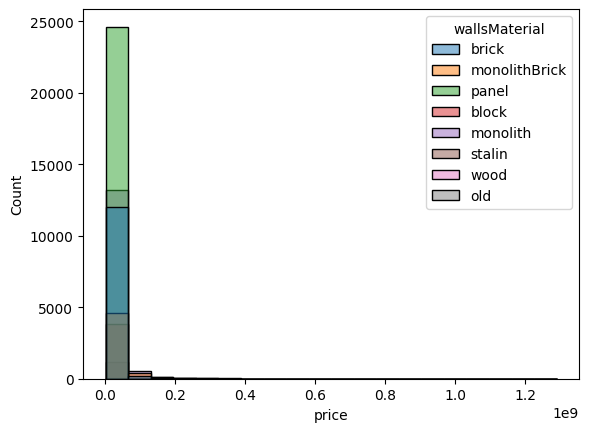

In [23]:
sns.histplot(data=df_no_dup, x='price', hue='wallsMaterial', bins=20)
plt.show()

In [104]:
# оставьте строки, соответсвующие максимальной цене
df_no_dup[df_no_dup['price'] == df_no_dup['price'].max()]

,wallsMaterial,floorNumber,floorsTotal,totalArea,kitchenArea,latitude,longitude,price
34228,monolithBrick,6,6.0,415.5,25.0,55.738622,37.602813,1290088799


In [116]:
# оставить самые дорогие квартиры в рамказ каждой группы по материалу стен
# первый вариант
tmp = df_no_dup.copy()
tmp['rank'] = tmp.groupby('wallsMaterial')['price'].rank(method='min', ascending=False)
tmp[tmp['rank'] == 1]

,wallsMaterial,floorNumber,floorsTotal,totalArea,kitchenArea,latitude,longitude,price,rank
711,panel,4,7.0,367.0,37.0,55.745068,37.595025,204000000,1.0
11168,wood,1,1.0,62.0,10.0,55.802492,37.505301,99900000,1.0
33183,None,1,4.0,90.0,9.0,55.771337,37.635566,18400000,1.0
33981,stalin,6,8.0,185.0,19.0,55.762860,37.592743,186000000,1.0
34100,block,7,7.0,330.0,25.0,55.743330,37.601439,191449160,1.0
34181,old,7,7.0,420.0,25.0,55.743857,37.601960,153581999,1.0
34194,brick,4,7.0,400.0,30.0,55.743005,37.602256,546997600,1.0
34203,monolith,2,7.0,420.0,30.0,55.758225,37.592608,928863935,1.0
34227,monolith,2,7.0,420.0,38.0,55.758225,37.592608,928863935,1.0
34228,monolithBrick,6,6.0,415.5,25.0,55.738622,37.602813,1290088799,1.0


In [117]:
# вариант через transform
tmp = df_no_dup.copy()
tmp.head(2)

,wallsMaterial,floorNumber,floorsTotal,totalArea,kitchenArea,latitude,longitude,price
0,brick,1,5.0,18.0,3.0,55.723379,37.628577,5600000
1,brick,1,5.0,15.0,3.0,55.725980,37.671031,4650000


In [120]:
tmp['max_group_price'] = tmp.groupby('wallsMaterial')['price'].transform(np.max)
tmp.head(2)

,wallsMaterial,floorNumber,floorsTotal,totalArea,kitchenArea,latitude,longitude,price,max_group_price
0,brick,1,5.0,18.0,3.0,55.723379,37.628577,5600000,546997600
1,brick,1,5.0,15.0,3.0,55.725980,37.671031,4650000,546997600


In [122]:
tmp[tmp['price'] == tmp['max_group_price']]

,wallsMaterial,floorNumber,floorsTotal,totalArea,kitchenArea,latitude,longitude,price,max_group_price
711,panel,4,7.0,367.0,37.0,55.745068,37.595025,204000000,204000000
11168,wood,1,1.0,62.0,10.0,55.802492,37.505301,99900000,99900000
33183,None,1,4.0,90.0,9.0,55.771337,37.635566,18400000,18400000
33981,stalin,6,8.0,185.0,19.0,55.762860,37.592743,186000000,186000000
34100,block,7,7.0,330.0,25.0,55.743330,37.601439,191449160,191449160
34181,old,7,7.0,420.0,25.0,55.743857,37.601960,153581999,153581999
34194,brick,4,7.0,400.0,30.0,55.743005,37.602256,546997600,546997600
34203,monolith,2,7.0,420.0,30.0,55.758225,37.592608,928863935,928863935
34227,monolith,2,7.0,420.0,38.0,55.758225,37.592608,928863935,928863935
34228,monolithBrick,6,6.0,415.5,25.0,55.738622,37.602813,1290088799,1290088799


In [123]:
tmp = df_no_dup.copy()
tmp[tmp['price'] == tmp.groupby('wallsMaterial')['price'].transform(np.max)]

,wallsMaterial,floorNumber,floorsTotal,totalArea,kitchenArea,latitude,longitude,price
711,panel,4,7.0,367.0,37.0,55.745068,37.595025,204000000
11168,wood,1,1.0,62.0,10.0,55.802492,37.505301,99900000
33183,None,1,4.0,90.0,9.0,55.771337,37.635566,18400000
33981,stalin,6,8.0,185.0,19.0,55.762860,37.592743,186000000
34100,block,7,7.0,330.0,25.0,55.743330,37.601439,191449160
34181,old,7,7.0,420.0,25.0,55.743857,37.601960,153581999
34194,brick,4,7.0,400.0,30.0,55.743005,37.602256,546997600
34203,monolith,2,7.0,420.0,30.0,55.758225,37.592608,928863935
34227,monolith,2,7.0,420.0,38.0,55.758225,37.592608,928863935
34228,monolithBrick,6,6.0,415.5,25.0,55.738622,37.602813,1290088799


## 12. (3 балла)
Согласитесь, картинка выше полный отстой. Попробуем два варианта: 
1. Прологарифмируем стоимость и построим гистограмму для логарифмов цен (основание логарифма -- двойка);
2. Срежем 5% самых дорогих квартир и построим гистограммы для оставшихся 95%.  

(**+1 балл**)  
Отобразите картинки на одном графике (то есть слева картинку для варианта 1, а справа -- для варианта два). 

<kbd>
<img src="data/task12.png" />
</kbd>

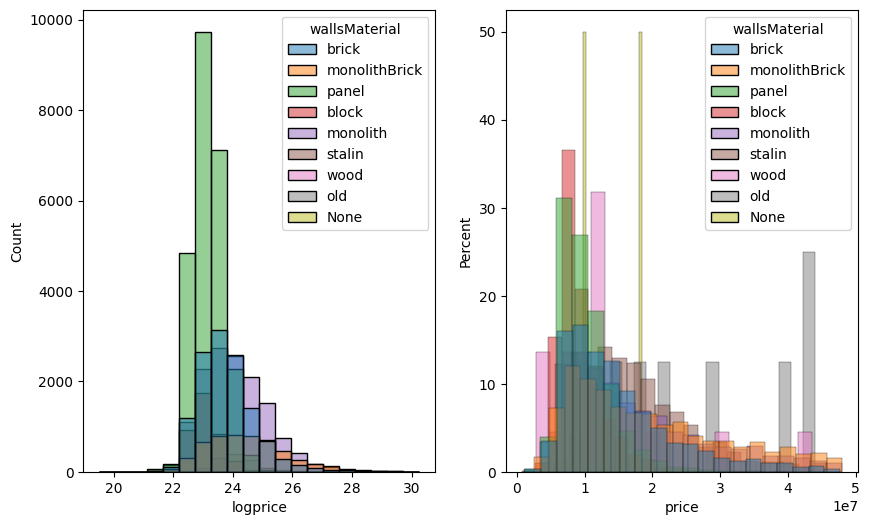

In [129]:
df_no_dup = df_no_dup.copy()

df_no_dup['logprice'] = np.log2(df_no_dup.price.values)
df_no_dup_95 = df_no_dup[df_no_dup.price < df_no_dup.price.quantile(.95)] 

fig, ax = plt.subplots(1, 2, figsize=(10, 6))

sns.histplot(data=df_no_dup, x='logprice', hue='wallsMaterial', ax=ax[0], bins=20)

sns.histplot(data=df_no_dup_95, x='price', hue='wallsMaterial', ax=ax[1], bins=20, stat='percent', common_bins=False, common_norm=False)

plt.show()

## 13. (2 балла)

Постройте гистограмму встречаемости типов материалов стены.  
Разбейте отдельно для квартир дороже 20МЛН, от 10МЛН до 20МЛН и дешевле 10 МЛН.

<kbd>
<img src="data/task13.png" />
</kbd>

C:\Users\igumn\AppData\Local\Temp\ipykernel_9280\378769115.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_dup['expensive'][df_no_dup.price < 1e7] = '<10M'


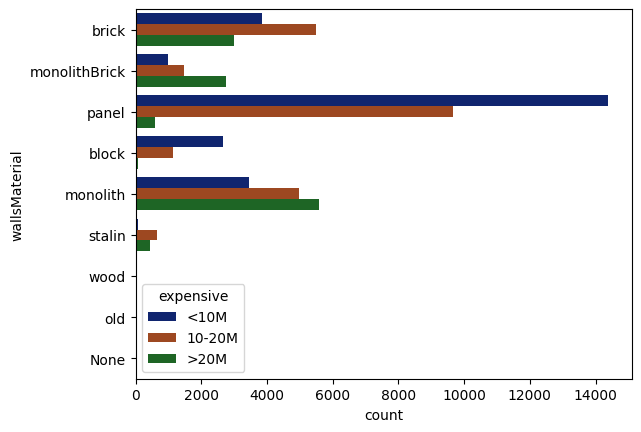

In [130]:
df_no_dup['expensive'] = 0
df_no_dup['expensive'][df_no_dup.price < 1e7] = '<10M'
df_no_dup['expensive'][df_no_dup.price >= 1e7] = '10-20M'
df_no_dup['expensive'][df_no_dup.price >= 2e7] = '>20M'

sns.countplot(data=df_no_dup, y='wallsMaterial', hue='expensive', palette='dark')
plt.show()

## 14 (2 балла)
Постройте гистограмму встречаемости типов материалов стены. Но теперь нужно вывести не частоту, а проценты.  
Разбейте отдельно для квартир дороже 20МЛН, от 10МЛН до 20МЛН и дешевле 10 МЛН

**Т.е. то, сколько процентов кирпичных домов приходится на категории <10M, 10-20М и >20М.**

<kbd>
<img src="data/task14.png" />
</kbd>

In [140]:
dat

,wallsMaterial,expensive,price,max_c,pct
0,None,10-20M,1,2,50.0
1,None,<10M,1,2,50.0
2,block,10-20M,1135,3862,29.4
3,block,<10M,2652,3862,68.7
4,block,>20M,75,3862,1.9
5,brick,10-20M,5496,12346,44.5
6,brick,<10M,3852,12346,31.2
7,brick,>20M,2998,12346,24.3
8,monolith,10-20M,4987,14018,35.6
9,monolith,<10M,3438,14018,24.5


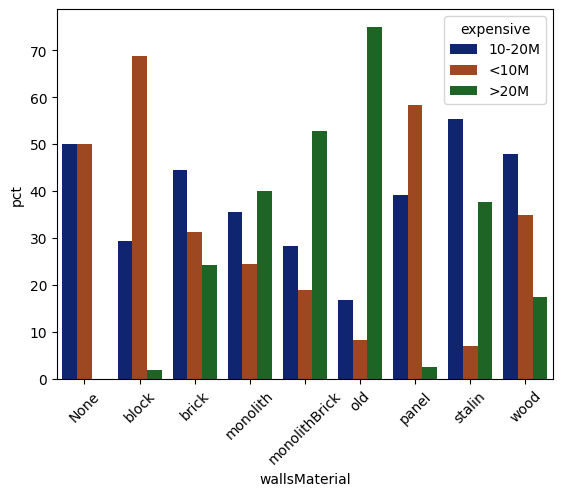

In [139]:
dat = df_no_dup.groupby(['wallsMaterial', 'expensive']).price.count().reset_index()
dat['max_c'] = dat.groupby('wallsMaterial').price.transform(np.sum)
dat['pct'] = (dat.price / dat['max_c'] * 100).round(1)

sns.barplot(data=dat, x='wallsMaterial', y='pct', hue='expensive', palette='dark')
plt.xticks(rotation=45)
plt.show()

# Введение в классическое машинное обучение

Будем работать с тем же файлом `moscow_flats_dataset_2020.csv`.

In [27]:
# будем работать с исходным файлом
df = pd.read_csv('data/moscow_flats_dataset_2020.csv', encoding='utf8', sep=',')

## 15. (3 балла)
Только на числовых признаках обучите модель линейной регрессии с параметрами по-умолчанию для определения стоимости квартиры. 

Указания:
1. Отберите числовые столбцы;
2. Разбейте данные для трейн и тест (размер тестовой выборки 25%, сид для рандомизации: 23042023 );
3. Обучите модель на тренинговой выборке;  
4. Сделайте предсказания модель на тестовой выборке;  
5. Посчитайте RMSLE (<a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_log_error.html">ссылка</a>);

In [28]:
df = df.select_dtypes(include=np.number)

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('price', axis=1), df['price'], test_size=0.25,random_state=23042023)

In [30]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [31]:
y_pred = model.predict(X_test)

In [32]:
from sklearn.metrics import mean_squared_log_error

mean_squared_log_error(y_test, y_pred)

ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

In [33]:
# сделаем отрицательные значения равными 0
y_pred = np.where(y_pred < 0, 1, y_pred)

mean_squared_log_error(y_test, y_pred, squared=False)

4.383046383673734

In [34]:
# т.е. средняя ошибка на 4.2 степени экспоненты

## 16 (3 балла)
Попробуем предсказывать теперь не стоимость, а её логарифм. Обучим линейную модель для предсказания логарифма цены, дальше возведем экспоненту в найденные степени (логарифм==степень), посчитаем ошибку.

Указания:
1. Отберите числовые столбцы;
2. Разбейте данные для трейн и тест (размер тестовой выборки 25%, сид для рандомизации: 23042023 );  
*2.2 _Стедайлте MinMax шкалирование числовых признаков (+1 балл)_
3. Прологарифмируйте цены в трейне;
4. Обучите модель на тренинговой выборке;  
5. Сделайте предсказания модель на тестовой выборке;  
6. Так как мы предсказали именно степени, а не сами цены, то возведите экспоненту в найденные степени;
7. Посчитайте RMSLE на ценах;

**Стало ли лучше? Почему?**

In [35]:
df = df.select_dtypes(include=np.number)

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('price', axis=1), df['price'], test_size=0.25,random_state=23042023)

In [37]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
y_train = np.log(y_train)

In [39]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [40]:
y_pred = model.predict(X_test)

In [41]:
y_pred = np.exp(y_pred)

In [42]:
mean_squared_log_error(y_test, y_pred, squared=False)

0.3736678617942575

#### Пояснение
Данные цен на квартиры часто распределены ЛогНормально.  
Это означает, что само распределение не имеет нормалньый вид, но если логарифмировать данные, то получается что-то нормальное.  
Есть целый комплекс преобразований, который называется преобразование бокса-кокса, направленный на нормализацию данных путём логарифмирования.  

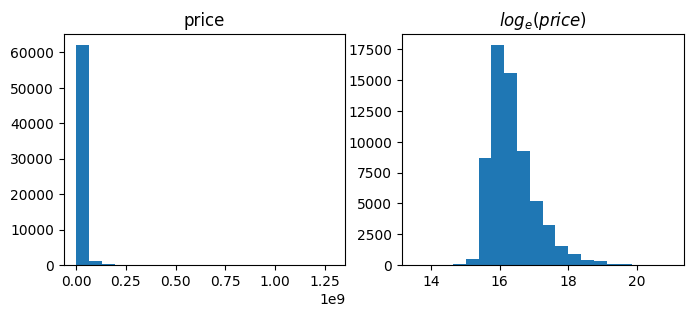

In [43]:
fig, ax =plt.subplots(1, 2, figsize=(8, 3))

ax[0].hist(df.price, bins=20)
ax[0].set_title('price')
ax[1].hist(np.log(df.price), bins=20)
ax[1].set_title('$log_e(price)$')

plt.show()

### 17. (5 баллов)
На исходных данных (не шкалированных) обучите модель случайного леса (RandomForestClassifier) для определения  значения "wallsMaterial" и определите оптимальные параметры с помощью GridSearchCV.

Укаазния:  
1. Разбейте данные на трейн и тест (размер тестовой выборки 25%, сид для рандомизации: 23042023 );  
2. Создайте сетку параметров для GridSearchCV.  
   Значения для перебора: 
   - `n_estimators: 10, 25, 50, 100`
   - `max_depth: 3, 5, 10`
   - `max_features: "sqrt", "log2"`  
   
Для скоринга используйте f1-score (average) (нужно создать scorer с помощью <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html">make_scorer</a>).   
(GridSearchCV учите только на тренинговой выборке)

3. На лучшей модели из GridSearchCV (атрибут best_estimator_ или как-то так) сделайте предсказания для тестовой выборки;  
4. Определите roc_auc_score (average) для предсказания.

In [44]:
df = pd.read_csv('data/moscow_flats_dataset_2020.csv', encoding='utf8', sep=',')
df = df.dropna()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('wallsMaterial', axis=1), df['wallsMaterial'], test_size=0.25,random_state=23042023)

In [45]:
params = {
    'n_estimators': [10, 25, 50, 100],
    'max_depth': [3, 5, 10],
    'max_features': ["sqrt", "log2"]
}

In [46]:
from sklearn.metrics import make_scorer, f1_score, roc_auc_score

scorer = make_scorer(f1_score, average='weighted')

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

model = GridSearchCV(estimator=RandomForestClassifier(),  
                     param_grid=params,
                     scoring=scorer,
                     n_jobs=4, 
                     verbose=0)

In [48]:
model.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'max_depth': [3, 5, 10],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 25, 50, 100]},
             scoring=make_scorer(f1_score, average=weighted))

In [49]:
model.best_params_

{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}

In [50]:
model.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [51]:
# посмотрим на важность признаков. просто так
sorted(zip(df.columns[1:], model.best_estimator_.feature_importances_), key=lambda x: x[1], reverse=True)

[('floorsTotal', 0.3255127701417305),
 ('kitchenArea', 0.2047632990865344),
 ('price', 0.14262868420921754),
 ('latitude', 0.11281845831847619),
 ('longitude', 0.09720701994878643),
 ('totalArea', 0.07963047342918389),
 ('floorNumber', 0.037439294866071025)]

In [52]:
# для roc_auc_score нужны не просто предсказания в виде лейблов, а именно вероятности принадлежности классам

In [53]:
# не
model.best_estimator_.predict(X_test)

array(['monolith', 'panel', 'panel', ..., 'panel', 'brick', 'panel'],
      dtype=object)

In [54]:
# а вот так
probs = model.best_estimator_.predict_proba(X_test)
probs, probs.shape

(array([[2.07260823e-02, 4.74354153e-02, 5.06768361e-01, ...,
         3.12764191e-01, 0.00000000e+00, 2.04081633e-04],
        [9.11084362e-02, 7.78733891e-02, 4.34859605e-02, ...,
         7.76833169e-01, 1.86442785e-03, 1.39965541e-04],
        [2.50055477e-02, 6.78958495e-02, 3.62205710e-01, ...,
         3.72905680e-01, 2.76764167e-03, 4.28929186e-04],
        ...,
        [2.38492375e-01, 6.94948577e-02, 6.95832808e-02, ...,
         6.07046191e-01, 1.82015273e-03, 2.05742179e-04],
        [5.45515901e-02, 5.46956071e-01, 3.81327031e-02, ...,
         2.50942153e-01, 9.46718075e-02, 3.52954756e-04],
        [1.14196736e-01, 5.09975350e-02, 1.39810301e-01, ...,
         6.71083139e-01, 9.99679503e-04, 4.26048102e-05]]),
 (15986, 8))

In [55]:
roc_auc_score(y_test, probs, multi_class='ovr')

0.8764935610084894